<a href="https://colab.research.google.com/github/CID007/Tensorflow-practice/blob/main/Time_series_stock_market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time series- stock market


*  In this notebook we will be working on data from stock market. We will learn how to get data , visualize and anlayze and predict based on previous performance .



In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

In [43]:
!pip install yfinance
from pandas_datareader.data import DataReader
import yfinance as yf
from datetime import datetime

In [44]:
# tech stock we will use for this analysis
tech_list=["TSLA" , "AMD", "INTC" ,"NVDA"]
end = datetime.now()
start = datetime(end.year -1, end.month, end.day)
for stock in tech_list:
  globals()[stock] = yf.download(stock, start, end)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


### lets check the data

In [45]:
company_list = [TSLA, AMD, INTC, NVDA]
company_name = ["TESLA", "AMD", "INTEL", "NVIDIA"]
for company, com_name in zip(company_list, company_name):
  company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-03-02,237.559998,244.089996,234.149994,242.199997,242.199997,38964200,NVIDIA
2022-03-03,242.619995,243.259995,234.690002,237.139999,237.139999,36509500,NVIDIA
2022-03-04,233.839996,236.800003,224.820007,229.360001,229.360001,43141500,NVIDIA
2022-03-07,228.169998,230.330002,213.300003,213.520004,213.520004,45082100,NVIDIA
2022-03-08,213.089996,223.729996,206.500000,215.139999,215.139999,55746700,NVIDIA
2022-03-09,223.869995,232.199997,222.470001,230.139999,230.139999,49274200,NVIDIA
2022-03-10,225.309998,227.880005,218.820007,226.580002,226.580002,42806600,NVIDIA
2022-03-11,230.220001,231.449997,220.460007,221.000000,221.000000,36659300,NVIDIA
2022-03-14,218.690002,222.619995,211.589996,213.300003,213.300003,38535400,NVIDIA


In [46]:
# Check summary stat of TESLA
TSLA.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,808.625336,826.014266,789.754191,808.107666,808.107666,2.573448e+07
std,173.346109,179.329128,165.211664,172.353016,172.353016,9.323778e+06
min,552.549988,566.210022,546.979980,563.460022,563.460022,9.800600e+06
25%,675.770020,687.510010,662.159973,671.869995,671.869995,1.892490e+07
50%,743.530029,758.909973,736.400024,752.919983,752.919983,2.403690e+07
75%,928.179993,946.270020,903.210022,931.250000,931.250000,3.082110e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,6.285210e+07


In [47]:
NVDA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2021-03-16 to 2022-03-15
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          253 non-null    float64
 1   High          253 non-null    float64
 2   Low           253 non-null    float64
 3   Close         253 non-null    float64
 4   Adj Close     253 non-null    float64
 5   Volume        253 non-null    int64  
 6   company_name  253 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


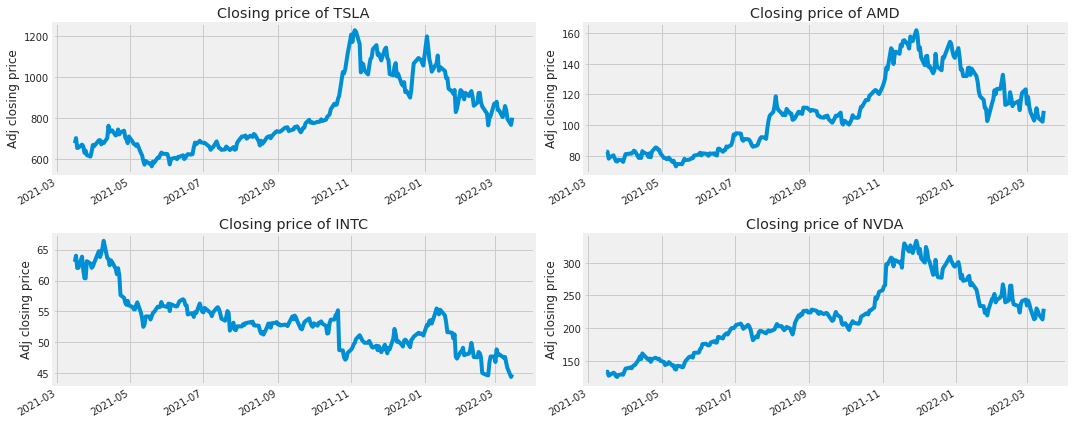

In [48]:
# Lets check closing price in a agraph

plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
  plt.subplot(2, 2, i)
  company['Adj Close'].plot()
  plt.ylabel('Adj closing price')
  plt.xlabel(None)
  plt.title(f"Closing price of {tech_list[i-1]}")

plt.tight_layout()


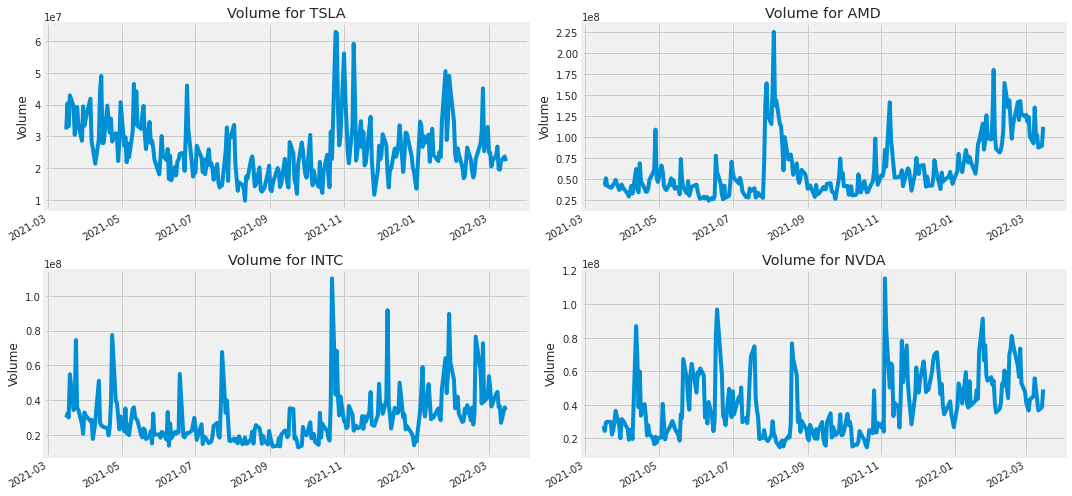

In [49]:
# Total volume of stoc being traged each day
plt.figure(figsize =(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list,  1):
  plt.subplot(2, 2, i)
  company['Volume'].plot()
  plt.ylabel('Volume')
  plt.xlabel(None)
  plt.title(f"Volume for {tech_list[i-1]}")

plt.tight_layout()

In [50]:
# Calculate moving average of the stock

ma_day = [10 ,20, 50]

for ma in ma_day:
  for company in company_list:
    column_name = f"MA for {ma} days"
    company[column_name] = company['Adj Close'].rolling(ma).mean()

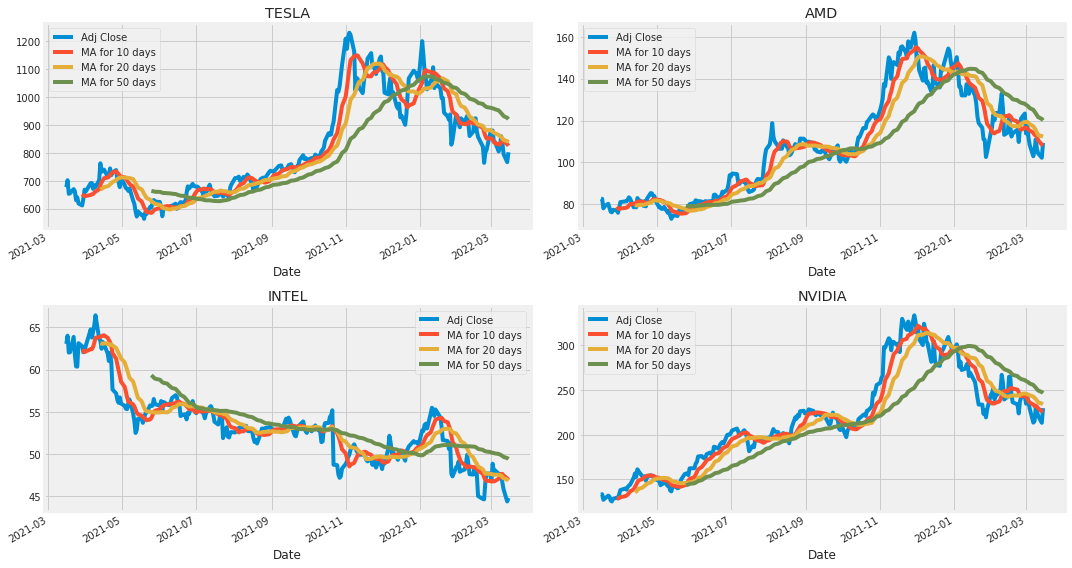

In [51]:
# plot all moving averages

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

TSLA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title("TESLA")

AMD[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title("AMD")

INTC[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title("INTEL")

NVDA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title("NVIDIA")

fig.tight_layout()

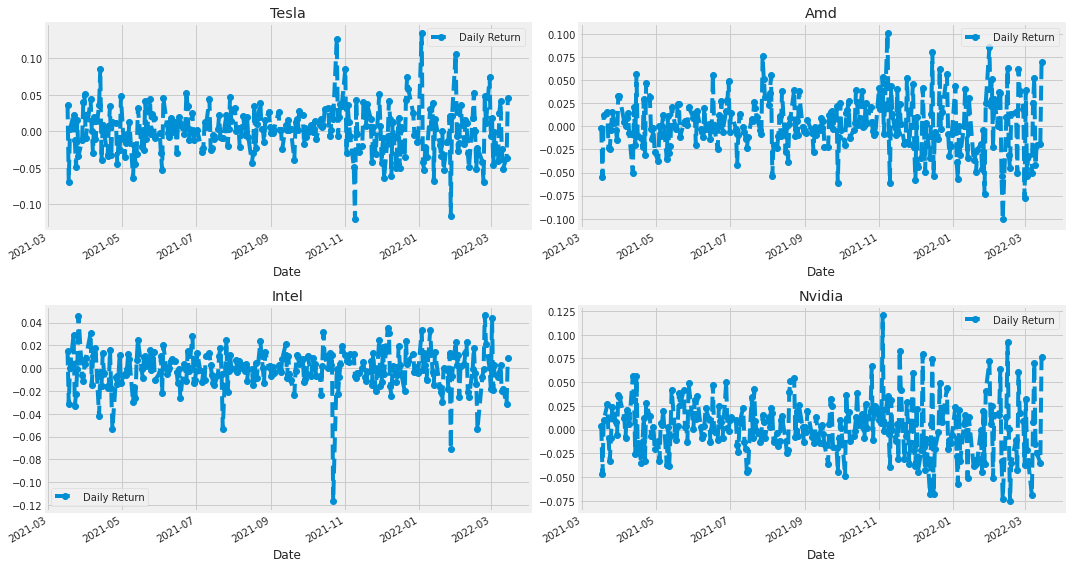

In [52]:
# Calculate daily return for each day

for company in company_list:
  company['Daily Return'] = company['Adj Close'].pct_change()

#plot daily return

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

TSLA['Daily Return'].plot(ax=axes[0,0],legend=True,linestyle='--',marker='o')
axes[0,0].set_title("Tesla")

AMD['Daily Return'].plot(ax=axes[0,1],legend=True,linestyle='--',marker='o')
axes[0,1].set_title("Amd")

INTC['Daily Return'].plot(ax=axes[1,0],legend=True,linestyle='--',marker='o')
axes[1,0].set_title("Intel")

NVDA['Daily Return'].plot(ax=axes[1,1],legend=True,linestyle='--',marker='o')
axes[1,1].set_title("Nvidia")

fig.tight_layout()





In [53]:
TSLA.describe()

,Open,High,Low,Close,Adj Close,Volume,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02,244.000000,234.000000,204.000000,252.000000
mean,808.625336,826.014266,789.754191,808.107666,808.107666,2.573448e+07,810.675588,813.510755,816.785058,0.001238
std,173.346109,179.329128,165.211664,172.353016,172.353016,9.323778e+06,170.076850,167.786216,162.781025,0.033737
min,552.549988,566.210022,546.979980,563.460022,563.460022,9.800600e+06,584.827008,596.594006,626.838202,-0.119903
25%,675.770020,687.510010,662.159973,671.869995,671.869995,1.892490e+07,668.445004,670.802367,658.870899,-0.018353
50%,743.530029,758.909973,736.400024,752.919983,752.919983,2.403690e+07,747.338498,749.430249,750.378698,0.001490
75%,928.179993,946.270020,903.210022,931.250000,931.250000,3.082110e+07,963.703003,994.963871,983.624796,0.019089
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,6.285210e+07,1149.187988,1119.457501,1073.611595,0.135317


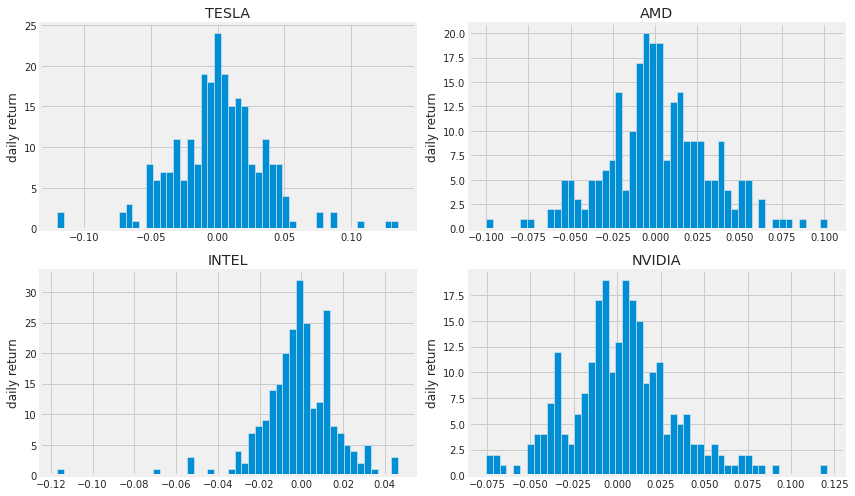

In [54]:
# Check average daily return using histogram
plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
  plt.subplot(2,2, i)
  company['Daily Return'].hist(bins=50)
  plt.ylabel('daily return')
  plt.xlabel(None)
  plt.title(f'{company_name[i-1]}')

plt.tight_layout()


In [55]:
TSLA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2021-03-16 to 2022-03-15
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Open            253 non-null    float64
 1   High            253 non-null    float64
 2   Low             253 non-null    float64
 3   Close           253 non-null    float64
 4   Adj Close       253 non-null    float64
 5   Volume          253 non-null    int64  
 6   company_name    253 non-null    object 
 7   MA for 10 days  244 non-null    float64
 8   MA for 20 days  234 non-null    float64
 9   MA for 50 days  204 non-null    float64
 10  Daily Return    252 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usage: 23.7+ KB


In [59]:
# Find correlation between different stocks
from pandas_datareader.data import DataReader
closing_df = DataReader(tech_list, start=start,end= end,data_source='yahoo')['Adj Close']

/usr/local/lib/python3.7/dist-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'TSLA', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.7/dist-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'AMD', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.7/dist-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'INTC', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.7/dist-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'NVDA', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


RemoteDataError: ignored